In [1]:
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [3]:
def get_player_id(first, last):
    for player in players:
        if player['firstName'] == first and player['lastName'] == last:
            return player['playerId']
    return -1

In [4]:
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text) #load team data

In [5]:
def get_team_id(team_name):
    for team in teams:
        if team['teamName'] == team_name:
            return team['teamId']
    return -1

In [6]:
get_team_id('New York Knicks')

1610612752

In [7]:
get_player_id('LeBron', 'James')

2544

In [8]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Golden State Warriors'),
            player_id = get_player_id('Stephen', 'Curry'),
            context_measure_simple = 'PTS',
            season_nullable = '2018-19',
            season_type_all_star = 'Regular Season')

In [9]:
shot_data = json.loads(shot_json.get_json())

In [10]:
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
curry_data = pd.DataFrame(rows)
curry_data.columns = headers

In [11]:
curry_data.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [12]:
def create_court(ax, color):
    
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    return ax

## Plot shot chart

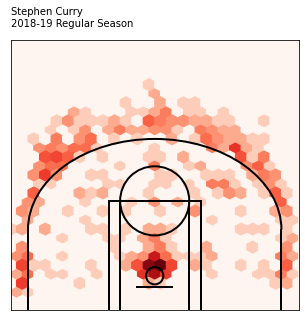

In [13]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
ax.hexbin(curry_data['LOC_X'], curry_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Reds')
ax.text(0, 1.05, 'Stephen Curry\n2018-19 Regular Season', transform=ax.transAxes, ha='left', va='baseline')
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

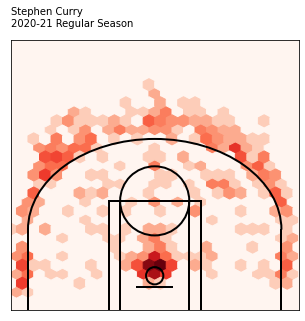

In [14]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
ax.hexbin(curry_data['LOC_X'], curry_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Reds')
ax.text(0, 1.05, 'Stephen Curry\n2020-21 Regular Season', transform=ax.transAxes, ha='left', va='baseline')
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

## Russell Westbrook 2016-17

In [15]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Oklahoma City Thunder'),
            player_id = get_player_id('Russell', 'Westbrook'),
            context_measure_simple = 'PTS',
            season_nullable = '2016-17',
            season_type_all_star = 'Regular Season')

In [16]:
shot_data = json.loads(shot_json.get_json())

In [17]:
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
westbrook_data = pd.DataFrame(rows)
westbrook_data.columns = headers

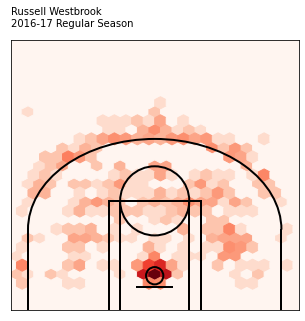

In [18]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

ax = create_court(ax, 'black')

ax.hexbin(westbrook_data['LOC_X'], westbrook_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Reds')
ax.text(0, 1.05, 'Russell Westbrook\n2016-17 Regular Season', transform=ax.transAxes, ha='left', va='baseline')
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

## James Harden 2019-20

In [19]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Houston Rockets'),
            player_id = get_player_id('James', 'Harden'),
            context_measure_simple = 'PTS',
            season_nullable = '2019-20',
            season_type_all_star = 'Regular Season')

In [20]:
shot_data = json.loads(shot_json.get_json())

In [21]:
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
harden_data = pd.DataFrame(rows)
harden_data.columns = headers

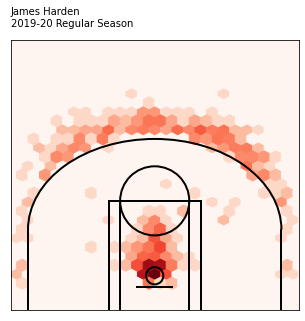

In [22]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
ax.hexbin(harden_data['LOC_X'], harden_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Reds')
ax.text(0, 1.05, 'James Harden\n2019-20 Regular Season', transform=ax.transAxes, ha='left', va='baseline')
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

# James Harden 2020-21

In [23]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Brooklyn Nets'),
            player_id = get_player_id('James', 'Harden'),
            context_measure_simple = 'PTS',
            season_nullable = '2020-21',
            season_type_all_star = 'Regular Season')

In [24]:
shot_data = json.loads(shot_json.get_json())
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
harden_data = pd.DataFrame(rows)
harden_data.columns = headers

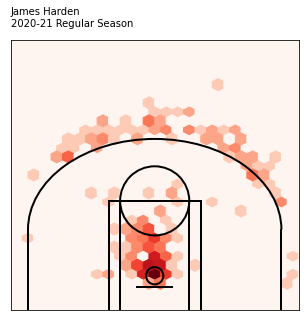

In [25]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
ax.hexbin(harden_data['LOC_X'], harden_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Reds')
ax.text(0, 1.05, 'James Harden\n2020-21 Regular Season', transform=ax.transAxes, ha='left', va='baseline')
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

## Giannis Antetokounmpo - 2018-19


In [26]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Milwaukee Bucks'),
            player_id = get_player_id('Giannis', 'Antetokounmpo'),
            context_measure_simple = 'PTS',
            season_nullable = '2017-18',
            season_type_all_star = 'Regular Season')

In [27]:
shot_data = json.loads(shot_json.get_json())

In [28]:
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
giannis_data = pd.DataFrame(rows)
giannis_data.columns = headers

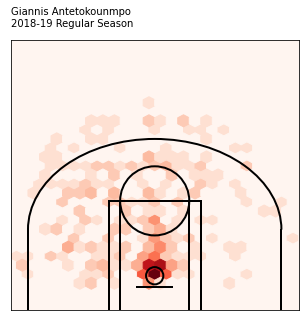

In [29]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

# Draw court
ax = create_court(ax, 'black')

# Plot hexbin of shots
ax.hexbin(giannis_data['LOC_X'], giannis_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Reds')

# Annotate player name and season
ax.text(0, 1.05, 'Giannis Antetokounmpo\n2018-19 Regular Season', transform=ax.transAxes, ha='left', va='baseline')

# Save and show figure
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()